# Stochastic Gradient Descent

In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
df=pd.read_csv("pro.csv")
df.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [2]:
## Independent Variables
xx=df['X']
## Dependent Variables
yy=df['Y']
X=np.column_stack((np.ones(shape=yy.shape),xx))

In [3]:
## Initial Cost
def initial_cost(b1,b0):
    N=len(xx)
    y_pred = (b1 * xx) + b0
    cost = sum([J**2 for J in yy-(y_pred)]) / N
    return cost
initial_cost(b1=0,b0=0)    
    
    

5565.107834490552

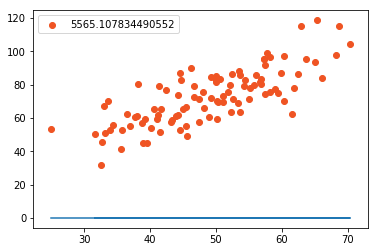

In [4]:
## When the bo and b1 are equal to zero and cost is 5565
b1=0
b0=0
reg_line=[b1*xx[i]+b0 for i in range(len(xx))]
plt.plot(xx,reg_line)
plt.scatter(xx, yy, c='#ef5423', label=initial_cost(b1,b0))
plt.legend()

In [5]:
### SGD Implementation Using Non-Vectorization Method (Applied with the help of For loop)
## Using SGD
def Grad_Linear(alpha,epochs,b0,b1):
    N=len(xx)  
    for i in range (epochs):
            y_pred = b1 * xx + b0
            cost = sum([data**2 for data in yy-y_pred]) / N
            derivative_b0=-(2/N)*sum((yy[i]-(b0+b1*xx[i])) for i in range(len(xx)))       
            derivative_b1=-(2/N)*sum(((yy[i]-(b0+b1*xx[i]))*xx[i]) for i in range(len(xx)))
            b0=b0-alpha*derivative_b0
            b1=b1-alpha*derivative_b1
            #print("b1={},b0={},cost={},epochs={}".format(b1,b0,cost,i))
            ## Creating two List's for Cost and Number of iterations

    return (b1,b0,cost,i)   



Grad_Linear(alpha=0.0001,epochs=100,b0=0,b1=0)

(1.4785630034263746, 0.035103775517483414, 112.74591485126739, 99)

In [6]:
### SGD Implementation Using Vectorization Method (Applied without the help of For loop)
## Using SGD
def Grad_Linear(xx,yy,alpha,epochs,b0,b1):
    N=len(xx)  
    for i in range (epochs):
            y_pred = (b1 * xx) + b0
            cost = sum([J**2 for J in (yy-y_pred)]) / N
            derivative_b0=-(2/N)*sum(yy - y_pred)      
            derivative_b1=-(2/N)*sum(xx* (yy - y_pred))
            b0=b0-(alpha*derivative_b0)
            b1=b1-(alpha*derivative_b1)
            #print("b1={},b0={},cost={},epochs={}".format(b1,b0,cost,i))
            ## Creating two List's for Cost and Number of iterations

    return b1,b0,cost,i   
Grad_Linear(xx,yy,alpha=0.0001,epochs=1000,b0=0,b1=0)
#0.6891928273528621, 8.689818887104948, 0.004791295575462396, 99

(1.4774977806149585, 0.08930986010626958, 112.71325397416943, 999)

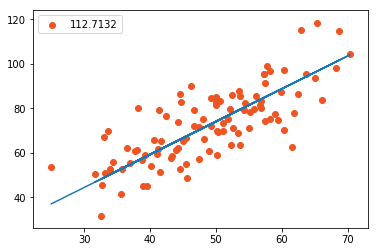

In [7]:
b1=1.4774977806149585
b0=0.08930986010626958
reg_line=[b1*xx[i]+b0 for i in range(len(xx))]
plt.plot(xx,reg_line)
plt.scatter(xx, yy, c='#ef5423', label='112.7132')
plt.legend()